# Clase 11 - Reconocimiento de Patrones en Imagenes

## Análisis de Componentes Principales (KLT/PCA)
Este cuaderno muestra paso a paso la transformación KLT (equivalente a PCA en este contexto) sobre un conjunto de datos 2D de ejemplo.
- Se centra la data.
- Se calcula la matriz de covarianza y sus autovalores/autovectores.
- Se proyecta la data sobre el mejor eje principal y se reconstruye (pérdida de información).
Cada celda de código contiene comentarios en español que explican lo que hace.

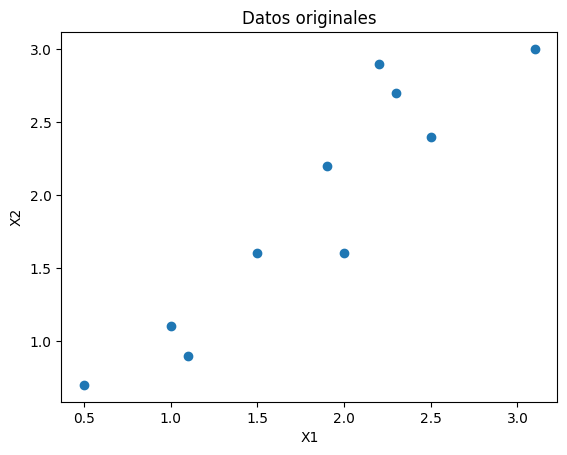

In [ ]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo (inventados) - cada fila es una observación 2D
Data = [[2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]]

# Convertir a array de NumPy para facilitar operaciones matriciales
Data = np.array(Data)

# Visualizar los datos originales
plt.figure()
plt.scatter(Data[:,0], Data[:,1])
plt.title('Datos originales')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

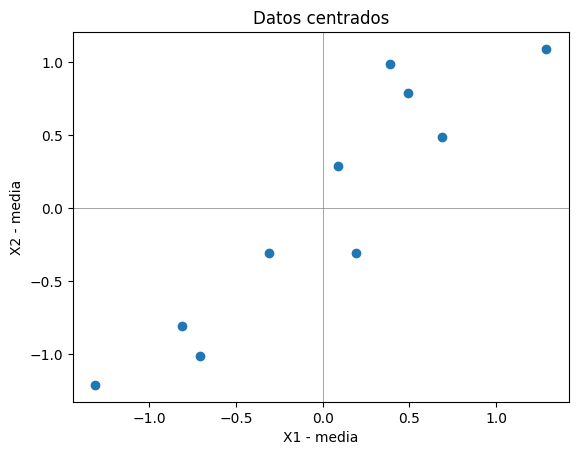

In [ ]:
# Centramos los datos restando la media (operación necesaria antes de PCA/KLT)
Data_mean = np.mean(Data, axis=0)  # media por columna (por cada dimensión)
Data_centered = Data - Data_mean  # datos centrados con media 0

# Visualizamos los datos centrados
plt.figure()
plt.scatter(Data_centered[:,0], Data_centered[:,1])
plt.title('Datos centrados')
plt.xlabel('X - media')
plt.ylabel('Y - media')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.show()

In [3]:
# Calcular la matriz de covarianza de los datos centrados
# rowvar=False indica que cada columna es una variable (cada dimensión)
cov_X = np.cov(Data_centered, rowvar=False)
# Obtener valores propios (D) y vectores propios (V) de la matriz de covarianza
D, V = np.linalg.eig(cov_X)

# Mostrar resultados (interpretación en comentarios):
# - D: autovalores (varianza explicada por cada componente)
# - V: columnas son autovectores (direcciones principales)
print("Matriz de covarianza:\n", cov_X, "\n")
print("Vectores propios (columnas):\n", V, "\n")
print("Valores propios (autovalores):\n", D)

Matriz de covarianza:
 [[0.61655556 0.61544444]
 [0.61544444 0.71655556]] 

Vectores propios (columnas):
 [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]] 

Valores propios (autovalores):
 [0.0490834  1.28402771]


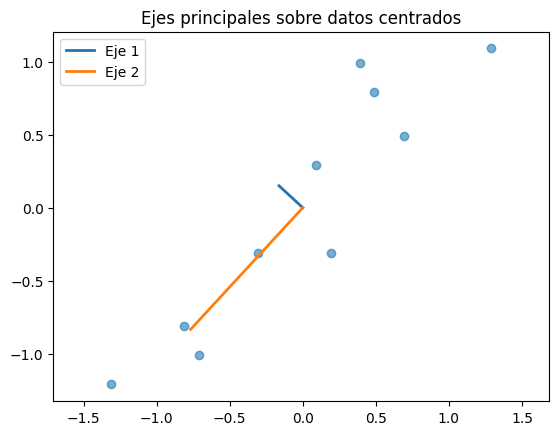

In [4]:
# Graficar los ejes principales sobre los datos centrados
plt.figure()
plt.scatter(Data_centered[:,0], Data_centered[:,1], alpha=0.6)
# Dibujar los vectores propios escalados por la raíz de los autovalores para mejorar visualización
for i in range(len(D)):
    vec = V[:, i]  # vector propio
    scale = np.sqrt(D[i])  # escala relacionada con la desviación estándar en esa dirección
    x_vals = [0, vec[0] * scale]
    y_vals = [0, vec[1] * scale]
    plt.plot(x_vals, y_vals, linewidth=2, label=f'Eje {i+1}')

plt.title('Ejes principales sobre datos centrados')
plt.axis('equal')
plt.legend()
plt.show()

In [5]:
# Calcular la fracción de varianza explicada por cada autovalor
explained_variance = D / np.sum(D)  # suma de explained_variance = 1
cumulative_variance = np.cumsum(explained_variance)

print("Varianza explicada por cada componente (fracción):\n", explained_variance, "\n")
print("Varianza acumulada:\n", cumulative_variance)

Varianza explicada por cada componente (fracción):
 [0.03681869 0.96318131] 

Varianza acumulada:
 [0.03681869 1.        ]


In [6]:
# Selección del mejor componente (el que tiene mayor autovalor)
# Nota: en PCA normalmente ordenamos los autovalores descendente y elegimos los primeros k
best = np.argmax(D)  # índice del mayor autovalor

# Vector de proyección (mejor eje) - W tendrá forma (2,1)
W = V[:, best].reshape(-1, 1)
print("Mejor eje (KLT) - vector de proyección:\n", W)

Mejor eje (KLT) - vector de proyección:
 [[-0.6778734 ]
 [-0.73517866]]


In [7]:
# Proyectar los datos centrados sobre el vector principal (KLT/PCA 1D)
klt = Data_centered @ W  # resultado con forma (n_samples, 1)
print("Datos transformados (KLT) - coordenada en el mejor eje:\n", klt)

Datos transformados (KLT) - coordenada en el mejor eje:
 [[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]


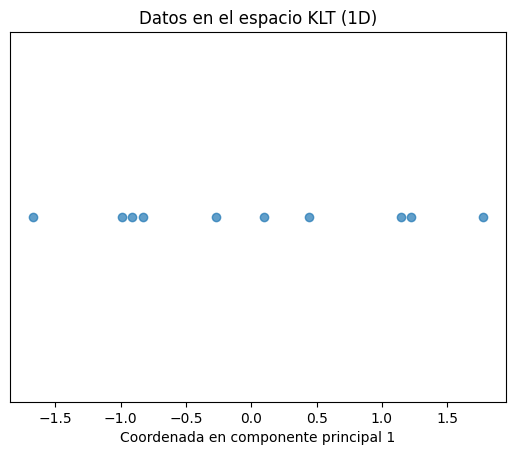

In [8]:
# Visualizar las coordenadas 1D resultantes (proyección sobre el eje principal)
plt.figure()
plt.scatter(klt, np.zeros_like(klt), alpha=0.7)
plt.yticks([])
plt.xlabel('Coordenada en componente principal 1')
plt.title('Datos en el espacio KLT (1D)')
plt.show()

In [9]:
# Reconstrucción de los datos desde la representación 1D (proyección inversa)
# Esto muestra la pérdida de información al reducir dimensiones
P = klt @ W.T  # reconstrucción en el espacio centrado
print("Datos reconstruidos (KLT) - en espacio centrado:\n", P)

Datos reconstruidos (KLT) - en espacio centrado:
 [[ 0.56125896  0.60870601]
 [-1.20497442 -1.30683911]
 [ 0.67258429  0.72944242]
 [ 0.18587995  0.20159364]
 [ 1.1359812   1.23201343]
 [ 0.61886391  0.67118069]
 [-0.06718365 -0.07286314]
 [-0.77587502 -0.84146502]
 [-0.29693982 -0.32204217]
 [-0.8295954  -0.89972675]]


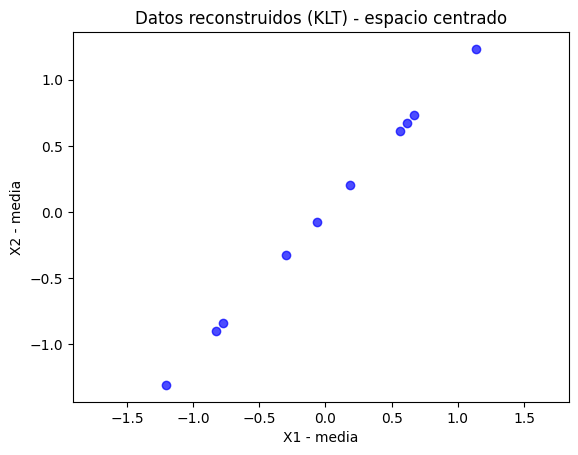

In [10]:
# Graficar los datos reconstruidos (aún en espacio centrado)
plt.figure()
plt.scatter(P[:,0], P[:,1], alpha=0.7, color='blue')
plt.title('Datos reconstruidos (KLT) - espacio centrado')
plt.axis('equal')
plt.xlabel('X1 - media')
plt.ylabel('X2 - media')
plt.show()

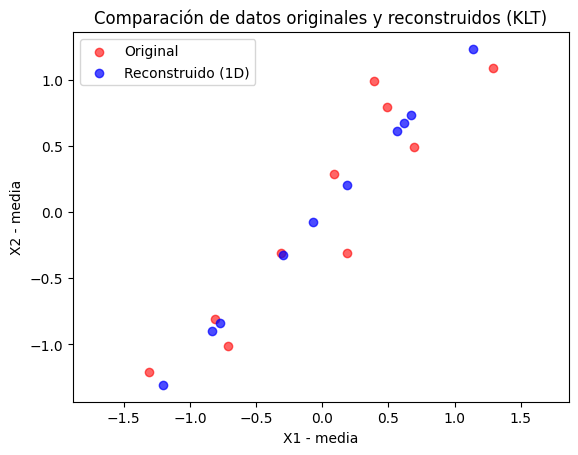

In [11]:
# Comparación: datos originales centrados vs datos reconstruidos
plt.figure()
plt.scatter(Data_centered[:,0], Data_centered[:,1], label='Original', alpha=0.6, color='red')
plt.scatter(P[:,0], P[:,1], label='Reconstruido (1D)', alpha=0.7, color='blue')
plt.title('Comparación de datos originales y reconstruidos (KLT)')
plt.axis('equal')
plt.xlabel('X1 - media')
plt.ylabel('X2 - media')
plt.legend()
plt.show()